3/ Develop an algorithm that uses the run-length code from Problem 2 to create a binary image in which pixels in region R are "on" and other pixels are "off." Subsample this 32 x 32-pixel image to create an 8 x 8-pixel binary image, and
develop an algorithm that derives the quadtree representation of this binary image.

number of nodes '85.0' and number of level '4'
total pixel 64
20 includes node: 81 to 84, and it's value: 255.0
19 includes node: 77 to 80, and it's value: 255.0
18 includes node: 73 to 76, and it's value: 255.0
17 includes node: 69 to 72, and it's value: 255.0
16 includes node: 65 to 68, and it's value: 255.0
15 includes node: 61 to 64, and it's value: 0.0
14 includes node: 57 to 60, and it's value: 0.0
13 includes node: 53 to 56, and it's value: 255.0
12 includes node: 49 to 52, and it's value: 255.0
11 includes node: 45 to 48, and it's value: 0.0
10 includes node: 41 to 44, and it's value: 0.0
9 includes node: 37 to 40, and it's value: 255.0
8 includes node: 33 to 36, and it's value: 255.0
7 includes node: 29 to 32, and it's value: 255.0
6 includes node: 25 to 28, and it's value: 255.0
5 includes node: 21 to 24, and it's value: 255.0
4 includes node: 17 to 20, and it's value: 255.0
3 includes node: 13 to 16, and it's value: 127.5
2 includes node: 9 to 12, and it's value: 127.5
1 inc

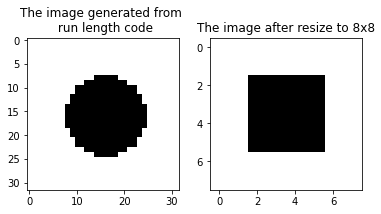

In [3]:
import matplotlib.pyplot as plt
from PIL import Image 
import math
s=""
class Point(object): # at a pixel
    def __init__(self, x, y): 
        self.x = x 
        self.y = y 
  
class Pixel(object):
    def __init__(self, color = 0,topLeft = Point(0, 0),bottomRight = Point(0, 0),neighbor =[0,0]):
        self.color = color
        self.topLeft = topLeft # position of fist and last pixel in a set of 4 pixel in 1 leaf
        self.bottomRight = bottomRight
        self.neighbor = neighbor # neighbor's index
        
class quadtree(): 
    def __init__(self, image): 
        self.level = 0
        # Total number of nodes of tree 
        self.size = 0
  
        # Store image pixelmap 
        self.image = image.load() 
  
        # Array of nodes 
        self.tree = [] 
        self.x = image.size[0] #width 
        self.y = image.size[1] #height
  
        size = image.size[0] * image.size[1] 
        level = 0
        # Count number of nodes and level 
        while(size >= 1): 
            self.size += size 
            size /= 4
            self.level = level
            level +=1
        print("number of nodes '{0}' and number of level '{1}'" .format(self.size,level))
        size = image.size[0] * image.size[1] 
        print("total pixel %d" %size)
        # Initialize array elements 
        for i in range(0, int(self.size)): 
            self.tree.append(Pixel()) 

        # Store leaves into array 
        count = 0
        for i in range(image.size[0] - 1, 0, -2): 
            for j in range(image.size[1] - 1, 0, -2): 
                # pixel at i,j (bottom right)
                # every leaf store whole it's color value
                self.tree[int(self.size) - 1 - 4 * count] = Pixel(self.image[i, j],  
                        Point(i, j),  
                        Point(i, j)) 
                self.tree[int(self.size)- 2 - 4 * count] = Pixel(self.image[i, j - 1],  
                        Point(i, j - 1), 
                        Point(i, j - 1)) 
                self.tree[int(self.size) - 3 - 4 * count] = Pixel(self.image[i - 1, j],  
                        Point(i - 1, j),  
                        Point(i - 1, j)) 
                self.tree[int(self.size) - 4 - 4 * count] = Pixel(self.image[i - 1, j - 1],  
                        Point(i - 1, j - 1),  
                        Point(i - 1, j - 1))
                count += 1
        # Calculate and create parent nodes by taking average value
        # print("parent start: %d" %count)
        end_leaf = int(self.size) - 4 * count - 1
        for i in range(end_leaf, -1, -1):
            # contain combination of 4 pixel in 1 leaf       
            self.tree[i] = Pixel( (self.tree[4*i+1].color + self.tree[4*i+2].color + self.tree[4*i+3].color + self.tree[4*i+4].color) /4,
                  self.tree[4 * i + 1].topLeft,
                  self.tree[4 * i + 4].bottomRight,[4*i+1,4*i+4])
                # position of fist and last pixel in a set of 4 pixel in 1 leaf
                # DFS, those nodes in the array are leaves, those first nodes contain next 4 nodes
                # ex: 8*8 = 64 => 85 nodes including parent nodes and leaves-> 21 node parent và 64 leaves
            print("{0} includes node: {1} to {2}, and it's value: {3}".format(i,4*i+1,4*i+4,self.tree[i].color))
    # minimize the format (g(wwww)->w, g(bbbb)->b)            
    def print(self,v):
        visited = set()        
        global s
        self.printUtil(v,visited)
        while(self.level >= 0):
            m=0
            finalStr=""
            while(m < len(s)):
                if s[m] == "g" and s[m+2]=="w" and s[m+3]=="w" and s[m+4]=="w" and s[m+5]=="w":
                    finalStr += "w"
                    m+=6
                elif s[m] == "g" and s[m+2]=="b" and s[m+3]=="b" and s[m+4]=="b" and s[m+5]=="b":
                    finalStr +="b"
                    m+=6
                else:
                    finalStr+=s[m]
                m+=1
            self.level -=1
            s = finalStr
        print(finalStr)
    # traverse through the tree and append to string   
    def printUtil(self,v,visited):
        global s
        visited.add(v)
        current  = self.tree[v]
        if v < self.size - self.x * self.y:
            s+="g("
            
        else:
            if self.tree[v].color == 255:
                s+="w"
               
            elif self.tree[v].color != 255:
                s+="b"

        for neighbour in range(self.tree[v].neighbor[0],self.tree[v].neighbor[1]+1):
            if neighbour not in visited:
                self.printUtil(neighbour,visited)
        if( v < self.size -self.x * self.y):
            s+=")"

img = Image.open('run_length.jpg').convert('1')
resized = img.resize((8,8))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('The image generated from \n run length code')

plt.subplot(1,2,2)
plt.imshow(resized)
plt.title('The image after resize to 8x8')

quadTree = quadtree(resized)
quadTree.print(0)
